# 6장 자전거 대여 수요 예측 경진대회 환경 세팅된 노트북 양식

### 1. 데이터 불러오기 및 확인

In [2]:
import numpy as np
import pandas as pd

data_path = "/kaggle/input/bike-sharing-demand/"

train = pd.read_csv(data_path + 'train.csv')  # 훈련 데이터
test  = pd.read_csv(data_path + 'test.csv')  # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv')  # 제출 샘플 데이터

In [3]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()  # 테스트 데이터에 casual과 register 피처가 없으므로 모델을 훈련하는 train 데이터에서도 두 피처를 빼야 한다

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
submission.head()  # 제출 파일은 데이터를 구분하는 ID값(datetime)과 타깃값으로 구성
# datetime은 데이터를 구분하는 역할이며 타깃값 예측에 도움이 되지 않으므로 train 데이터에서 제거하자

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [7]:
train.info()  # info()함수는 데이터프레임의 각 열의 결측값 개수, 데이터 타입 파악 가능
# 모든 피처의 Non-Null Count(비결측값 데이터 개수)가 전체 데이터 수와 같으므로 train데이터에는 결측값이 없는 것으로 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()  # test데이터에도 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 2. 데이터 시각화
### 피처 엔지니어링 (시각화 전 분석하기 적합한 형태로 변환해주기)

#### datetime

In [9]:
print(train['datetime'][100])  # 임의로 100번째 원소를 출력하여 구성요소별로 나누어보기
print(train['datetime'][100].split())  # 공백 기준으로 문자열 나누기 - 괄호 안 공백
print(train['datetime'][100].split()[0])  # 날짜
print(train['datetime'][100].split()[1])  # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [10]:
print(train['datetime'][100].split()[0])  # 날짜
print(train['datetime'][100].split()[0].split("-"))  # "-" 기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split("-")[0]) # 년도
print(train['datetime'][100].split()[0].split("-")[1]) # 월
print(train['datetime'][100].split()[0].split("-")[2]) # 일

2011-01-05
['2011', '01', '05']
2011
01
05


In [11]:
print(train['datetime'][100].split()[1])  # 시간
print(train['datetime'][100].split()[1].split(":")) # ":" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(":")[0]) # 시
print(train['datetime'][100].split()[1].split(":")[1]) # 분
print(train['datetime'][100].split()[1].split(":")[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


In [12]:
# apply()함수 적용
train['date'] = train['datetime'].apply(lambda x: x.split()[0])  # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split("-")[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split("-")[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split("-")[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(":")[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(":")[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(":")[2])

### 요일 피처 생성하기
object타입인 datetime피처의 요일을 불러오기 위해 먼저 datetime타입으로 변경하여 요일을 정수로 받아온 후 해당 요일의 이름을 문자열로 반환

In [13]:
from datetime import datetime # 여기서 datetime은 라이브러리로, 피처 datetime과 다른 것
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d'))  # object(문자열) -> datetime 타입으로 데이터타입 변경

# 정수로 요일 반환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())

# 문자열로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [14]:
# apply()함수 적용하여 요일 피처 생성

train['weekday'] = train['date'].apply(
    lambda dateString:
    calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

#### season, weather

In [15]:
train['season'] = train['season'].map({1:'Spring',
                                       2:'Summer',
                                       3:'Fall',
                                       4:'Winter'})
train['weather'] = train['weather'].map({1:'Clear',
                                        2:'Mist, Few Clouds',
                                        3:'Light Snow, Rain, Thunderstorm',
                                        4:'Heavy Rain, Thunderstorm, Snow, Fog'})

In [16]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [17]:
# date피처가 제공하는 정보는 모두 year, month, day 피처에도 있으므로 date피처 제거
# 3 months == season 이므로 season 피처만 남기고 month 피처 제거 (지나치게 세분화된 피처를 더 큰 분류로 묶었을 때 성능이 올라가는 경향이 있음)

### 그래프로 데이터 시각화
#### o 분포도 (distribution plot)

In [18]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline  # matplotlib이 그린 그래프를 주피터 노트북에서 바로 출력

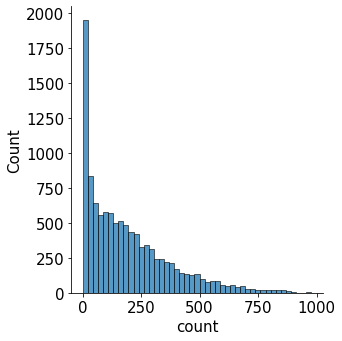

In [19]:
# 분포도 (distribution plot)
# 타깃값인 count의 분포도

mpl.rc('font', size=15)  # 폰트 크기 15
sns.displot(train['count'])

# x축 : count(타깃값)
# y축 : 총 개수
# 분포가 왼쪽으로 편향되어 있음을 확인. 회귀 모델이 좋은 성능을 내려면 데이터가 정규분포를 따라야 함. 현재 데이터 분포를 정규분포에 가깝게 만들기 위해 로그변환 필요.
# 이후 지수변환을 하여 실제 타깃값인 count로 복원해야 함

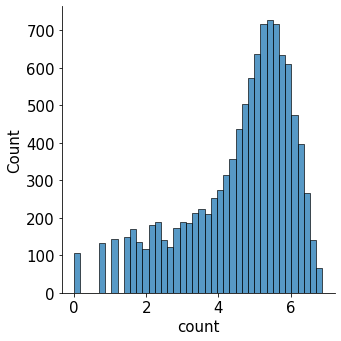

In [20]:
# 로그변환
# 보통 데이터가 왼쪽으로 편향되어 있을 때 사용
sns.displot(np.log(train['count']));

# 변환 전보다 정규분포에 가까워졌음을 확인

#### o 막대 그래프 (bar plot)
연도, 월, 일, 시, 분, 초별로 총 여섯 가지 평균 대여 수량을 표현한 막대 그래프

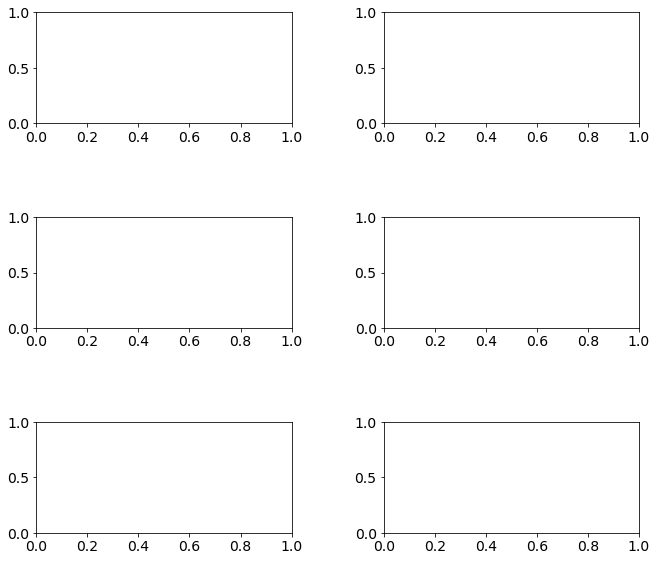

In [21]:
mpl.rc('font', size=14)  # 폰트 크기
mpl.rc('axes', titlesize=15)  # 각 축의 제목 폰트 크기
figure, axes = plt.subplots(nrows=3, ncols=2)  # 3행 2열 Figure 생성    # subplots()함수 : 여러 그래프를 동시에 그릴 때 사용
plt.tight_layout()  # 그래프 사이 여백 확보
figure.set_size_inches(10,9)  # 전체 Figure 크기를 10x9인치로 설정

<AxesSubplot:xlabel='second', ylabel='count'>

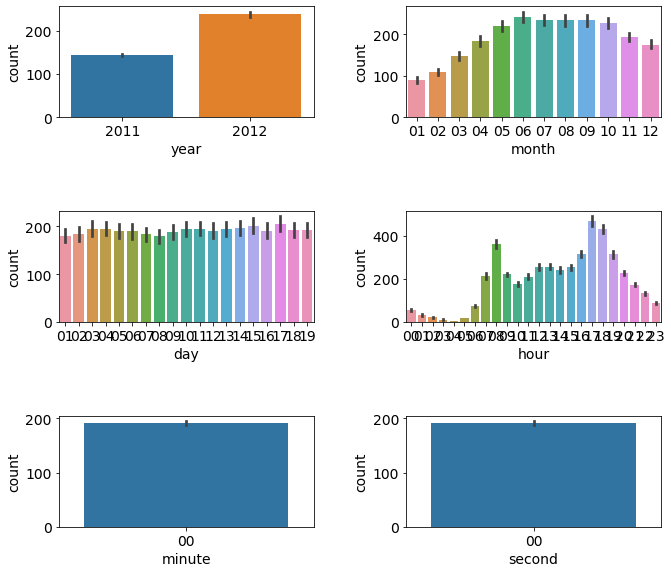

In [22]:
mpl.rc('font', size=14) 
mpl.rc('axes', titlesize=15)  
figure, axes = plt.subplots(nrows=3, ncols=2)  
plt.tight_layout()
figure.set_size_inches(10,9) 

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1]) ## ax파라미터에는 AxesSubplot객체, 그러니까 0행0열의 축부터 2행1열까지 위치를 지정

# 의도한 대로 모두 출력되었지만 x축의 라벨들이 서로 겹치는 것들이 보이고 각 서브플랏들이 어떤 정보를 나타낸건지 알아보기 아직 어려운 상태

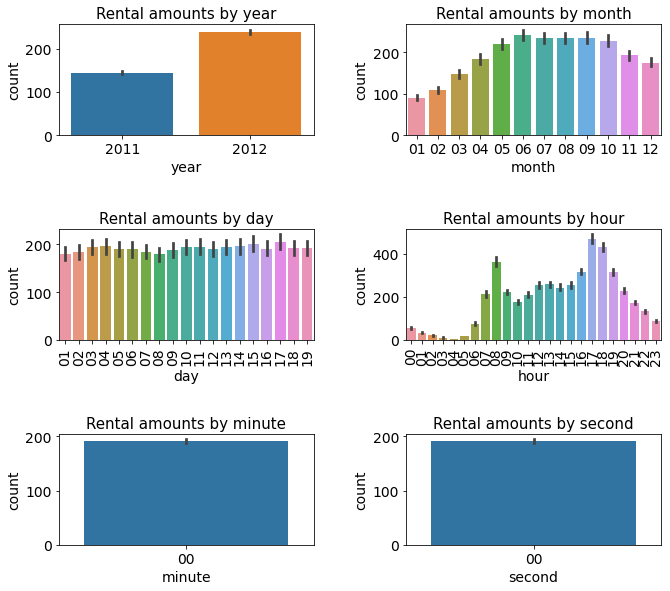

In [23]:
mpl.rc('font', size=14) 
mpl.rc('axes', titlesize=15)  
figure, axes = plt.subplots(nrows=3, ncols=2)  
plt.tight_layout()
figure.set_size_inches(10,9) 

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1]) 

# 각 서브플롯에 제목 입력
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 겹치는 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

#### o 박스 플롯 (box plot)
(범주형 데이터인) 계절, 날씨, 공휴일, 근무일별 대열 수량(수치형 데이터)를 표현한 박스 플롯

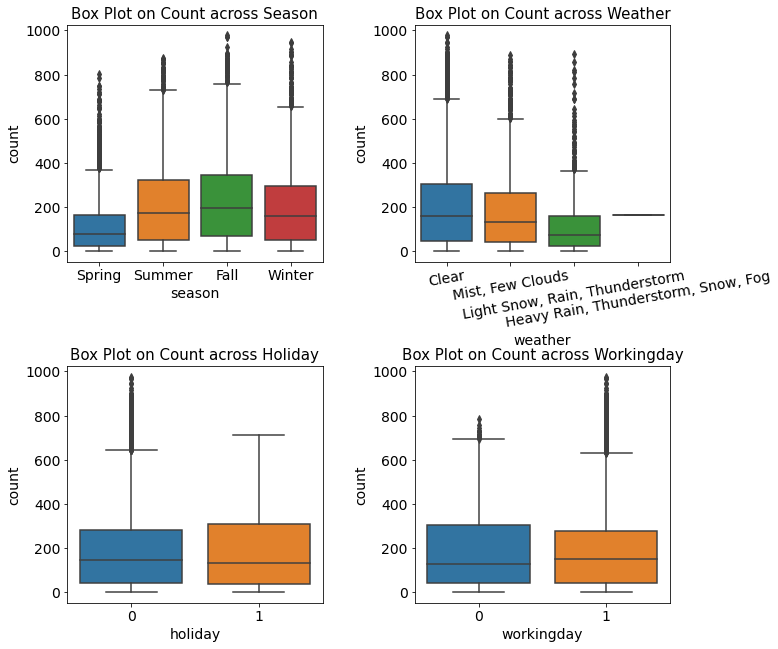

In [24]:
# Figure 생성
figure, axes = plt.subplots(nrows=2, ncols=2)  # 2행 2열 figure
plt.tight_layout()
figure.set_size_inches(10,10)  # 전체 figure 크기 10x10 인치

# 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량
sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])

# 세부 설정: 서브플롯에 제목 추가, 겹치는 x축 라벨 회전
axes[0, 0].set(title='Box Plot on Count across Season')
axes[0, 1].set(title='Box Plot on Count across Weather')
axes[1, 0].set(title='Box Plot on Count across Holiday')
axes[1, 1].set(title='Box Plot on Count across Workingday')

axes[0, 1].tick_params(axis='x', labelrotation=10)  # 10도 회전

#질문: 공휴일과 근무일은 상관관계가 있지 않나. 따로 보는게 맞나?

#### o 포인트 플롯 (point plot)
근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량을 표현한 포인트 플롯

<AxesSubplot:xlabel='hour', ylabel='count'>

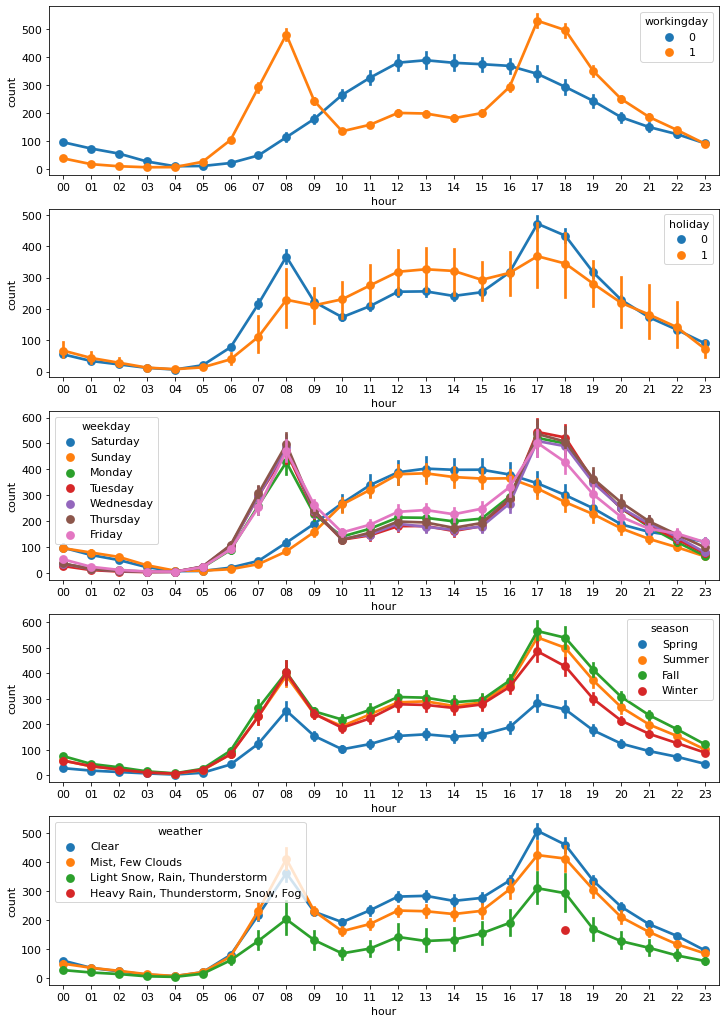

In [25]:
# Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)  #5행 1열
figure.set_size_inches(12, 18)

# 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0]) # hue 파라미터에 할당된 피처를 기준으로 나뉨
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

# 5번째 그래프를 보면 18시에 대여한 건수가 있음. 이상치로 보고 제거 고려

#### o 회귀선을 포함한 산점도 그래프 (scatter plot with regression line)
(수치형 데이터인) 온도, 체감 온도, 풍속, 습도별 대여 수량을 표현

<AxesSubplot:xlabel='humidity', ylabel='count'>

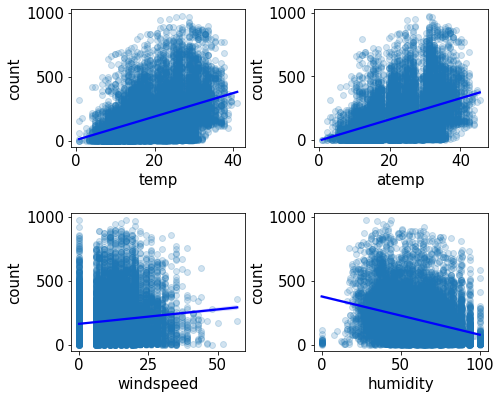

In [26]:
# figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)  # 2행 2열
plt.tight_layout()
figure.set_size_inches(7,6)

# 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량
sns.regplot(x='temp', y='count', data=train, ax=axes[0,0], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})  # 투명도 20%, 회귀선 색상 파란색
sns.regplot(x='atemp', y='count', data=train, ax=axes[0,1], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1,0], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1,1], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})

# 풍속별 대여 수량 그래프를 보면 풍속이 0인 데이터가 많은 것을 확인. 실제 풍속이 0이기 어려우므로 결측치일 가능성 높음. (관측치가 없거나 오류로 0으로 기록)
# 결측치를 다른 값으로 대체하거나 windspeed 피처를 삭제해주어 해결

#### o 히트맵(heatmap)
데이터 간 관계를 색상으로 표현
* 상관계수가 1에 가까울 수록 높은 상관관계

In [27]:
# 피처 간 상관계수
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


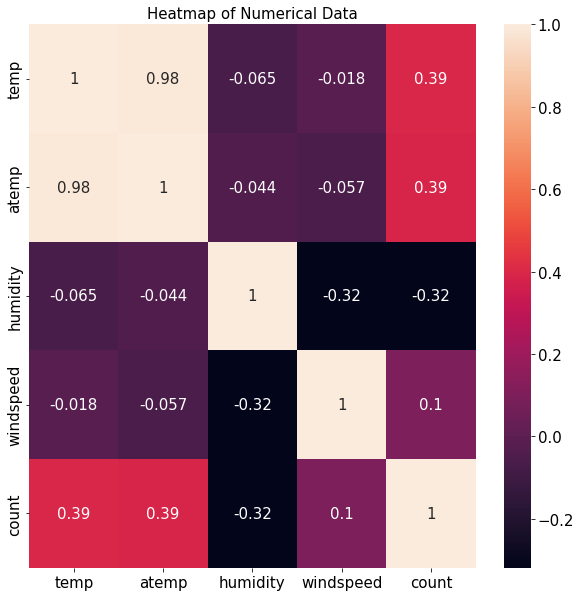

In [28]:
# 피처 간 상관관계 매트릭스
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True)  # annot=True : 상관계수를 숫자로 표기
ax.set(title='Heatmap of Numerical Data');

# 타깃값인 count와의 상관관계가 중요함
# 양의 상관관계: 높을 수록 대여 수량이 많음
# 음의 상관관계: 낮을 수록 대여 수량이 많음
# 상관계수의 절댓값이 낮을 수록 약한 상관관계 == 예측에 그닥 도움 안 됨. 따라서 상관관계가 약한 windspeed 피처는 제거 고려